In [3]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [4]:
# Load the Loan data

Data = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\Diamonds Prices2022.csv", header=0)

# Copy to back-up file

Data_bk = Data.copy()

# Display first 5 values

Data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
del Data['Unnamed: 0']

In [6]:

# Display the information of dataset

Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


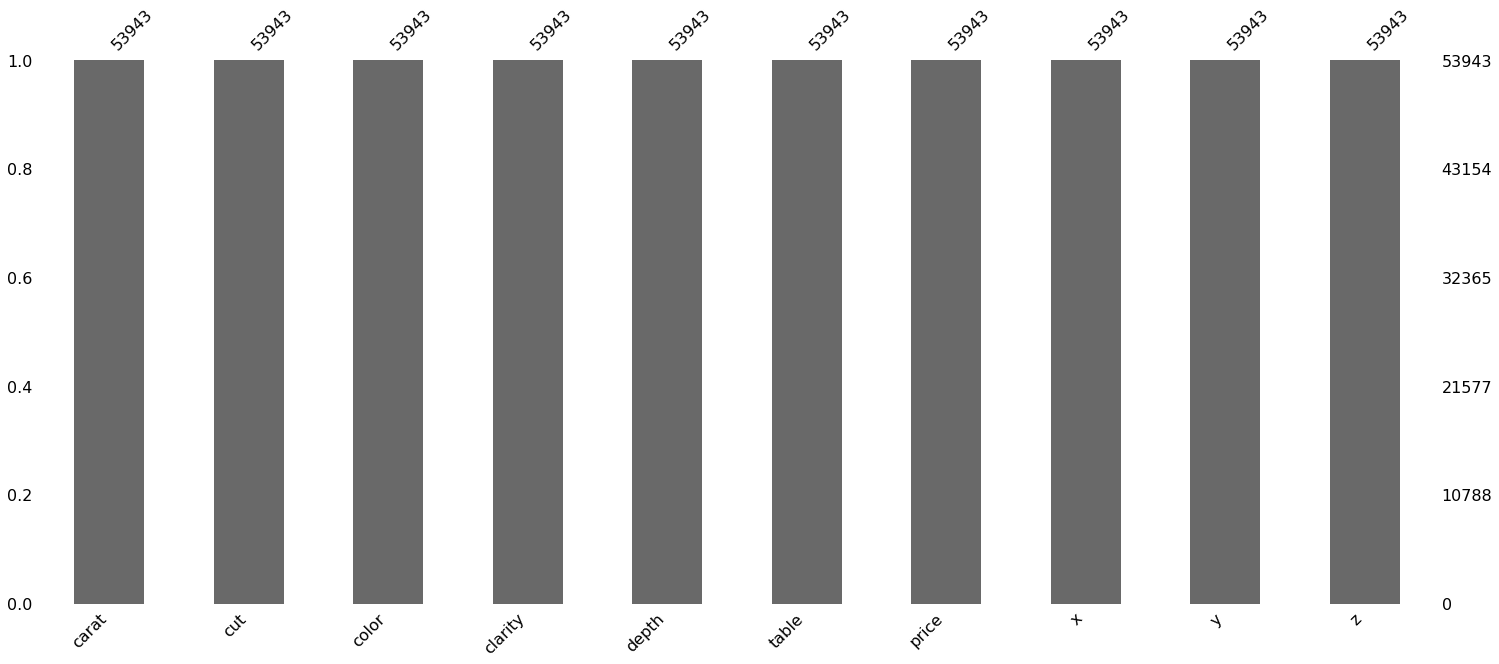

In [7]:
import missingno as msn
msn.bar(Data)
plt.show()

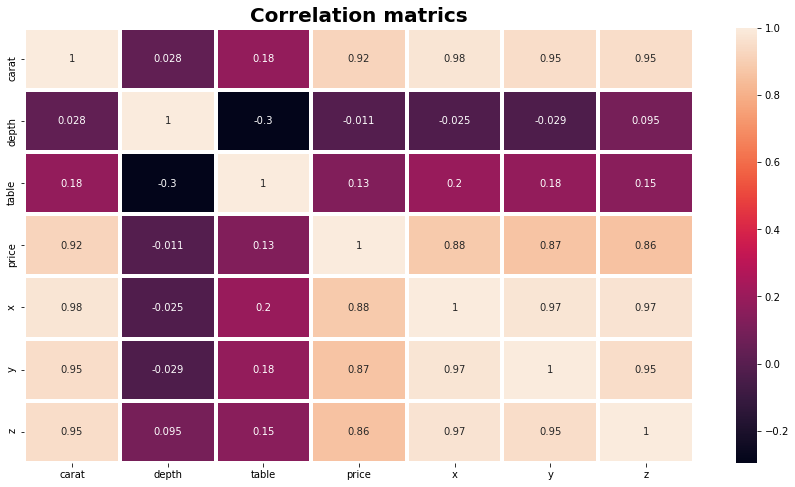

In [9]:
#Correlation with Price column
plt.figure(figsize=(15,8))
sns.heatmap(Data.corr(), linewidths=3, annot=True)
plt.title("Correlation matrics", size=20, weight='bold')
plt.show()

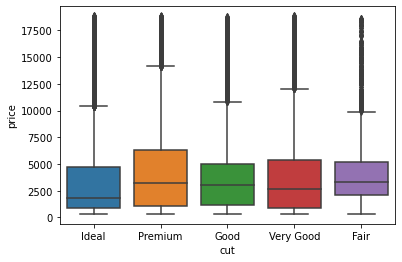

In [11]:
sns.boxplot(x='cut', y='price', data=Data)
plt.show()

In [15]:
!pip install ggplot

In [17]:
ggplot(Data, aes(factor(clarity), price, fill=clarity)) 
geom_boxplot() 
ggtitle("Diamond Price according Clarity") 
xlab("Type of Clarity") 
ylab("Diamond Price in US Dollars")

NameError: name 'ggplot' is not defined

In [5]:
Data['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Data['color']=LE.fit_transform(Data['color'])

In [7]:
Data['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Data['cut']=LE.fit_transform(Data['cut'])

In [9]:
Data['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Data['clarity']=LE.fit_transform(Data['clarity'])

In [11]:
Data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,1,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,2,2,59.8,62.0,2756,5.74,5.73,3.43


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int32  
 2   color    53943 non-null  int32  
 3   clarity  53943 non-null  int32  
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


In [13]:
Data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
Data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,2.553047,2.594127,3.835104,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.027702,1.701087,1.724587,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
Data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [16]:
cols1=['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y','z']

In [17]:
IndepVar = []
for col in Data.columns:
    if col != 'price':
        IndepVar.append(col)

TargetVar = 'price'

x = Data[IndepVar]
y = Data[TargetVar]

In [18]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=143)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37760, 9), (16183, 9), (37760,), (16183,))

In [19]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [20]:
# Load the result dataset

RGRResults = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\muni_1.csv", header=0)
RGRResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [21]:
!pip install lightgbm


In [22]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()

modelGBR = GradientBoostingRegressor()

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelSVR, modelXGR, modelKNN, modelETR, modelGBR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResults = RGRResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 10695.396
Mean Squared Error (MSE): 118505191.13
Root Mean Squared Error (RMSE): 10886.009
R2_score: -6.379713
Root Mean Squared Log Error (RMSLE): 9.295
Mean Absolute Percentage Error (MAPE): 626.71 %
Adj R Square:  -6.380944
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1707.943
Mean Squared Error (MSE): 9899684.98
Root Mean Squared Error (RMSE): 3146.376
R2_score: 0.383514
Root Mean Squared Log Error (RMSLE): 8.054
Mean Absolute Percentage Error (MAPE): 40.68 %
Adj R Square:  0.383411
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 851.636
Mean Squared Error (MSE): 2516526.086
Root Mean Squared Error (RMSE): 1586.356
R2_score: 0.843288
Root Mean Squared Log Error (RMSLE): 7.369

In [23]:
# Results with comparing the all the algorithms 

RGRResults.to_csv("C://Users//Narasimha Reddy//OneDrive//Desktop//intern//muni_1.csv")

RGRResults.head(20)

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),10695.395829,-6.380944,10886.008962,626.714991,1.185052e+08,9.295234,-6.379713
1,DecisionTreeRegressor(),1707.943212,0.383411,3146.376484,40.679669,9.899685e+06,8.054007,0.383514
2,"(DecisionTreeRegressor(max_features=1.0, rando...",851.635810,0.843262,1586.356229,22.598837,2.516526e+06,7.369195,0.843288
3,SVR(),2356.775414,-0.016803,4040.462573,50.193684,1.632534e+07,8.304114,-0.016633
4,"XGBRegressor(base_score=0.5, booster='gbtree',...",944.426499,0.864567,1474.597685,36.994599,2.174438e+06,7.296140,0.864590
5,KNeighborsRegressor(),2491.710795,0.136779,3722.835408,52.447999,1.385950e+07,8.222241,0.136923
6,"(ExtraTreeRegressor(random_state=507785356), E...",916.480723,0.914051,1174.718582,53.331771,1.379964e+06,7.068784,0.914065
7,([DecisionTreeRegressor(criterion='friedman_ms...,2103.516742,0.582152,2590.130546,159.896521,6.708776e+06,7.859464,0.582222
